In [2]:
pip install pandas_datareader


  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance


     ---------------------------------------- 73.5/73.5 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 10.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138680 sha256=704354cbd925e4e474cce0a32fcc9550a422895711b68ff120cf209070690e9c
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e2\53\cd\01e683140f777fc841bcb4ced360a727a4ea3109fb4fc69c0d
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Set the date range for data collection
start_date = '2002-01-01'
end_date = '2018-10-31'

# Fetch IBM stock data from Yahoo Finance using yfinance
ibm_data = yf.download('IBM', start=start_date, end=end_date)

# Display the first few rows of the dataset
print(ibm_data.head())

# Set the date range for data collection
start_date = '2002-01-01'
end_date = '2018-10-31'

# Fetch IBM stock data from Yahoo Finance using yfinance
ibm_data = yf.download('IBM', start=start_date, end=end_date)

# Display the first few rows of the dataset
print(ibm_data.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2002-01-02  115.296364  116.156792  114.531548  116.156792  63.949764  7178489
2002-01-03  116.156792  118.757172  114.961761  118.221794  65.086670  9018298
2002-01-04  118.594643  120.076485  118.527725  120.076485  66.107750  8791839
2002-01-07  119.502869  120.640533  118.260040  118.594643  65.291916  6212822
2002-01-08  118.785851  119.694077  118.288719  119.216064  65.634010  5556143
                  Open        High         Low       Close  Adj Close   Volume
Date                                                                          
2002-01-02  115.296364  116.156792  114.531548  116.156792  63.949764  7178489
2002-01-03  116.156792  118.757172  114.961761  118.221794  65.086670  9018298
2002-01-04  118.594643  120.076485  118.527725  120.076485  66.107750  8791839
2002-01-07  119.502869  120.640533  118.260040  118.

In [25]:
# Dropping unnecessary columns and renaming 'Adj Close' to 'Close'
ibm_data = ibm_data[['Adj Close']]
ibm_data.rename(columns={'Adj Close': 'Close'}, inplace=True)

# Calculating daily returns
ibm_data['Today'] = ibm_data['Close'].pct_change()

# Creating lagged return features
for i in range(1, 6):
    ibm_data[f'L{i}'] = ibm_data['Today'].shift(i)

# Drop rows with missing values
ibm_data.dropna(inplace=True)

# Display the first few rows after preprocessing
print(ibm_data.head())


                Close     Today        L1        L2        L3        L4  \
Date                                                                      
2002-01-10  64.286636 -0.018877 -0.001683  0.005239 -0.012341  0.015688   
2002-01-11  63.323406 -0.014983 -0.018877 -0.001683  0.005239 -0.012341   
2002-01-14  62.133888 -0.018785 -0.014983 -0.018877 -0.001683  0.005239   
2002-01-15  62.554989  0.006777 -0.018785 -0.014983 -0.018877 -0.001683   
2002-01-16  61.791798 -0.012200  0.006777 -0.018785 -0.014983 -0.018877   

                  L5  
Date                  
2002-01-10  0.017778  
2002-01-11  0.015688  
2002-01-14 -0.012341  
2002-01-15  0.005239  
2002-01-16 -0.001683  


C:\Users\dell\AppData\Local\Temp\ipykernel_7356\105936270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_data.rename(columns={'Adj Close': 'Close'}, inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_7356\105936270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm_data['Today'] = ibm_data['Close'].pct_change()
C:\Users\dell\AppData\Local\Temp\ipykernel_7356\105936270.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [31]:
# Display basic statistics of the dataset
print(ibm_data.describe())

              Open         High          Low        Close    Adj Close  \
count  4238.000000  4238.000000  4238.000000  4238.000000  4238.000000   
mean    125.734184   126.770833   124.787609   125.795969    79.991847   
std      39.171018    39.289537    39.053937    39.177733    29.621626   
min      52.246655    54.206501    51.634800    52.648186    29.144930   
25%      87.468927    88.281549    86.603727    87.485657    49.634104   
50%     122.791588   123.642448   121.978966   122.877632    75.157795   
75%     156.692154   157.590820   155.602295   156.673042   108.159676   
max     205.908218   206.405350   204.875717   206.309753   132.362518   

             Volume  
count  4.238000e+03  
mean   6.311749e+06  
std    3.403509e+06  
min    1.074765e+06  
25%    4.045144e+06  
50%    5.438782e+06  
75%    7.578113e+06  
max    4.310284e+07  


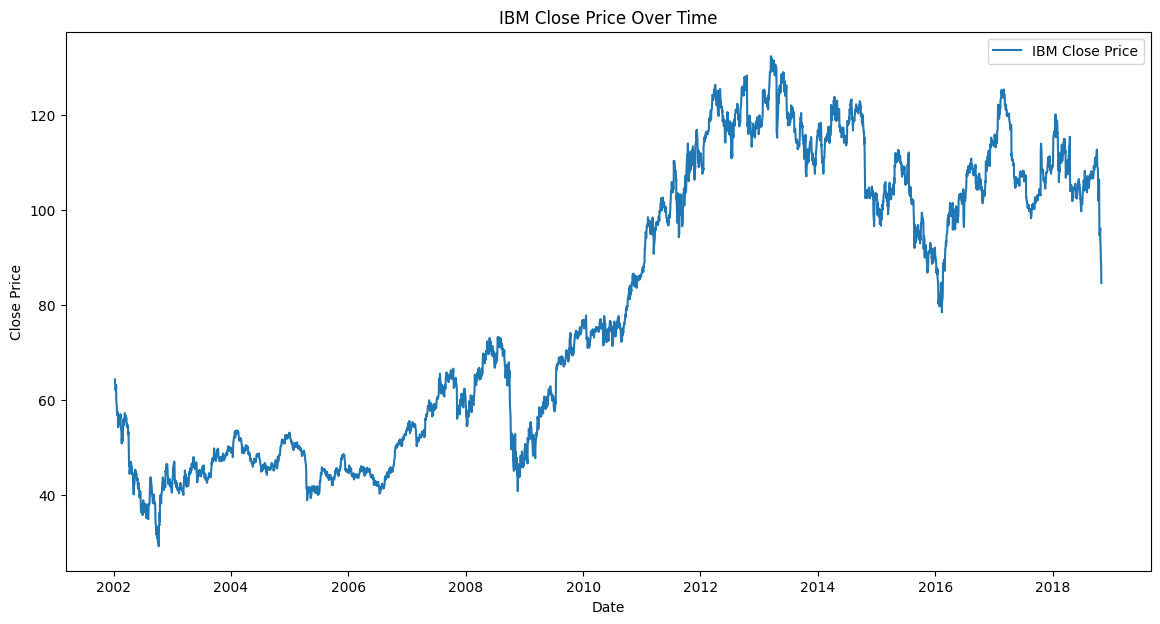

In [27]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(ibm_data['Close'], label='IBM Close Price')
plt.title('IBM Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

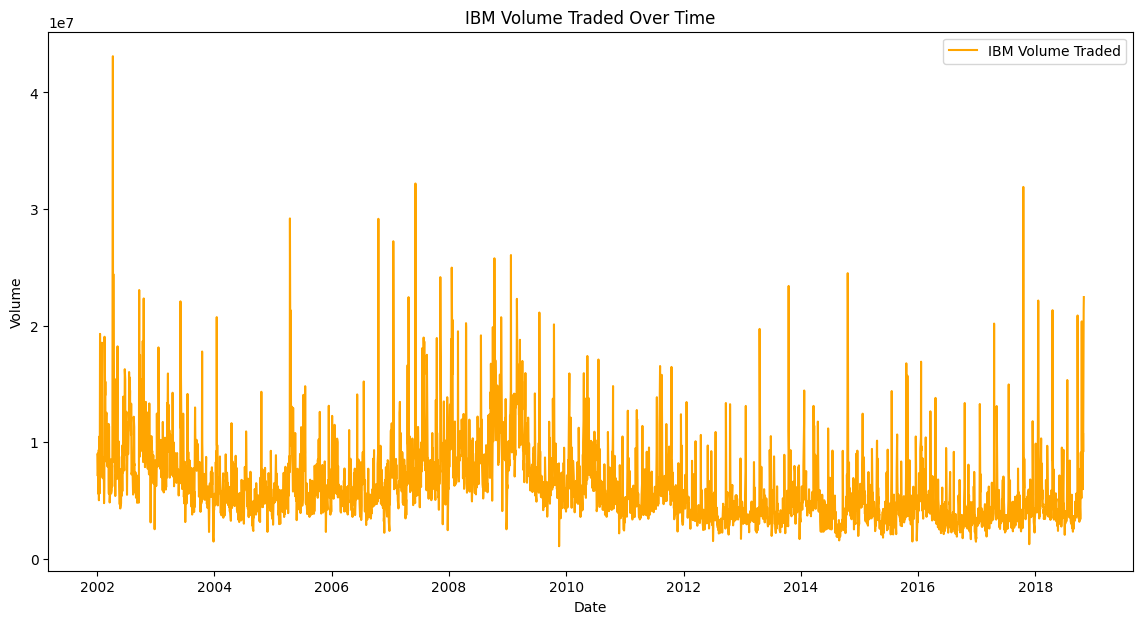

In [32]:
# Plotting the volume traded
plt.figure(figsize=(14, 7))
plt.plot(ibm_data['Volume'], label='IBM Volume Traded', color='orange')
plt.title('IBM Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [33]:
# Calculating daily returns
ibm_data['Daily Return'] = ibm_data['Close'].pct_change()

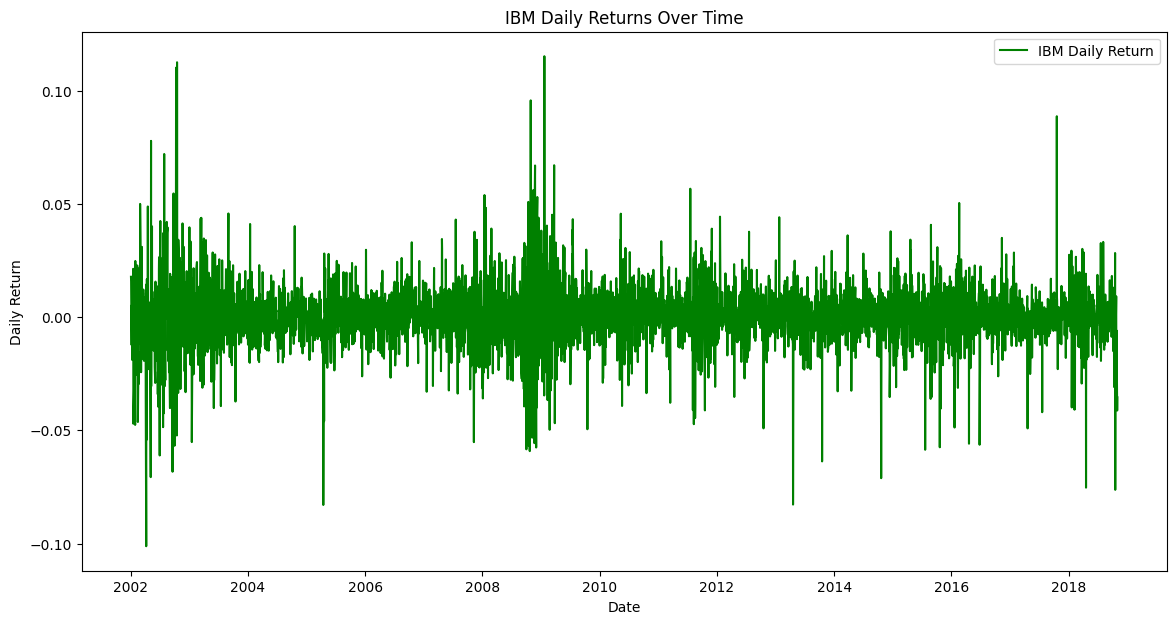

In [34]:
# Plotting daily returns
plt.figure(figsize=(14, 7))
plt.plot(ibm_data['Daily Return'], label='IBM Daily Return', color='green')
plt.title('IBM Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

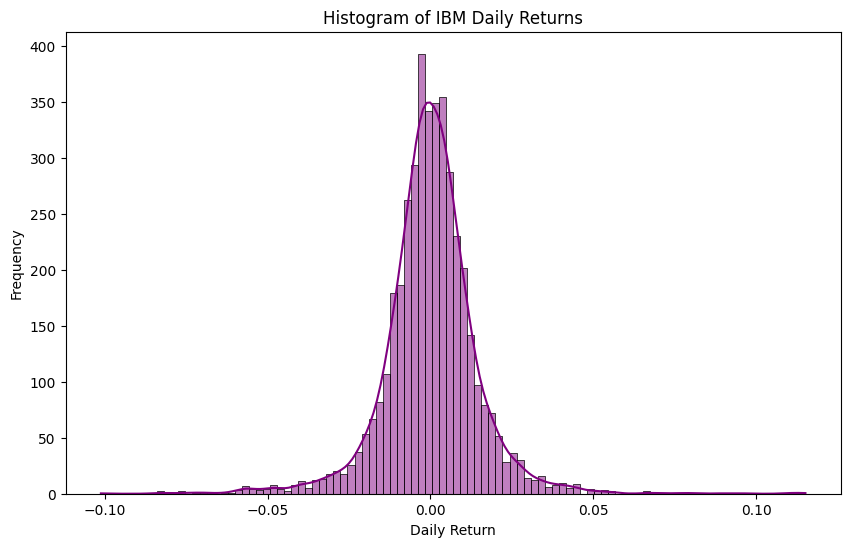

In [35]:
# Histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(ibm_data['Daily Return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Histogram of IBM Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Correlation matrix
corr_matrix = ibm_data[['Close', 'Volume', 'Daily Return']].corr()
print(corr_matrix)

                 Close    Volume  Daily Return
Close         1.000000 -0.410797      0.017956
Volume       -0.410797  1.000000     -0.064766
Daily Return  0.017956 -0.064766      1.000000


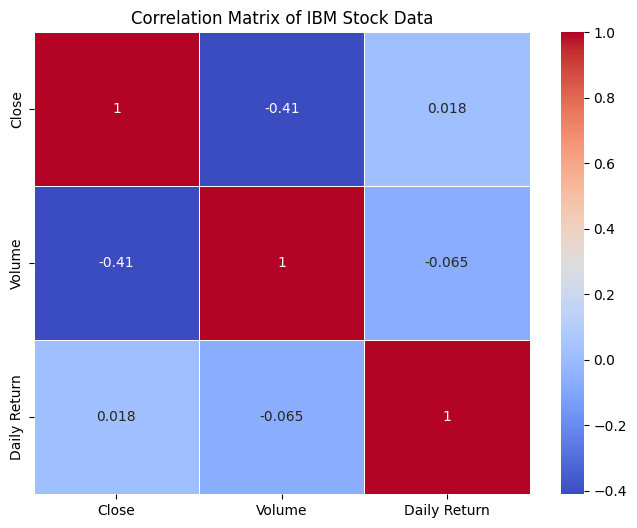

In [37]:
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of IBM Stock Data')
plt.show()

In [38]:
# Drop rows with NaN values
ibm_data.dropna(inplace=True)

# Preparing the data
X = ibm_data.drop(columns=['Close', 'Daily Return'])
y = ibm_data['Daily Return']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Applying LASSO for feature selection
lasso = LassoCV(cv=10)
lasso.fit(X_pca, y)
X_lasso = X_pca[:, lasso.coef_ != 0]


In [42]:
from sklearn.model_selection import  cross_val_score
def cross_val_best_split(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    split_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        split_scores.append(r2)

    best_split_index = np.argmax(split_scores)
    print(f"Best split index: {best_split_index}, R2 score: {split_scores[best_split_index]}")
    return list(kf.split(X))[best_split_index]

# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
best_split_index = cross_val_best_split(dt_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor()
best_split_index = cross_val_best_split(rf_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf_params = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2']}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# AdaBoost Regressor
ab_model = AdaBoostRegressor()
best_split_index = cross_val_best_split(ab_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
ab_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
ab_grid = GridSearchCV(ab_model, ab_params, cv=5, n_jobs=-1)
ab_grid.fit(X_train, y_train)
best_ab = ab_grid.best_estimator_
y_pred_ab = best_ab.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
best_split_index = cross_val_best_split(gb_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)

# Neural Network Regressor
nn_model = MLPRegressor(max_iter=500)
best_split_index = cross_val_best_split(nn_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
nn_params = {'hidden_layer_sizes': [(50,), (100,), (50,50)], 'activation': ['relu', 'tanh'], 'learning_rate': ['constant', 'adaptive']}
nn_grid = GridSearchCV(nn_model, nn_params, cv=5, n_jobs=-1)
nn_grid.fit(X_train, y_train)
best_nn = nn_grid.best_estimator_
y_pred_nn = best_nn.predict(X_test)

# Linear Regression
lr_model = LinearRegression()
best_split_index = cross_val_best_split(lr_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# LSTM Regressor
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

best_split_index = cross_val_best_split(lr_model, X_lasso, y)
train_index, test_index = best_split_index
X_train, X_test = X_lasso[train_index], X_lasso[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Reshape data for LSTM model
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_model = create_lstm_model((X_train_lstm.shape[1], 1))
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} - MSE: {mse}, R-squared: {r2}, MAE: {mae}')
    return mse, r2, mae

# Evaluate all models
metrics = {}
metrics['Decision Tree'] = evaluate_model(y_test, y_pred_dt, 'Decision Tree')
metrics['Random Forest'] = evaluate_model(y_test, y_pred_rf, 'Random Forest')
metrics['AdaBoost'] = evaluate_model(y_test, y_pred_ab, 'AdaBoost')
metrics['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')
metrics['Neural Network'] = evaluate_model(y_test, y_pred_nn, 'Neural Network')
metrics['Linear Regression'] = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
metrics['LSTM'] = evaluate_model(y_test, y_pred_lstm, 'LSTM')



Best split index: 4, R2 score: -0.7932173670477103
Best split index: 4, R2 score: -0.13428615641534392


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dell\anaconda3\lib\site-packages\sklear

Best split index: 4, R2 score: -0.005011802350512129
Best split index: 4, R2 score: 0.02542127955814899
Best split index: 4, R2 score: -0.16440291589326406
Best split index: 4, R2 score: 0.011091601084343816
Best split index: 4, R2 score: 0.011091601084343816
27/27 [==============================] - 2s 5ms/step
Decision Tree - MSE: 0.0001949430608046452, R-squared: 0.06755152832188072, MAE: 0.009768708600834093
Random Forest - MSE: 0.00023205865696019636, R-squared: -0.10997918637920545, MAE: 0.010527438325323489
AdaBoost - MSE: 0.0001943983123442269, R-squared: 0.07015716028061492, MAE: 0.009739560132888915
Gradient Boosting - MSE: 0.00019578397948346845, R-squared: 0.06352925980081703, MAE: 0.009778459723295515
Neural Network - MSE: 0.0002488436525225284, R-squared: -0.19026490362720105, MAE: 0.011256000614342935
Linear Regression - MSE: 0.0002067468991536799, R-squared: 0.011091601084343816, MAE: 0.009884498260025491
LSTM - MSE: 0.00020319026583068872, R-squared: 0.02810363163651619

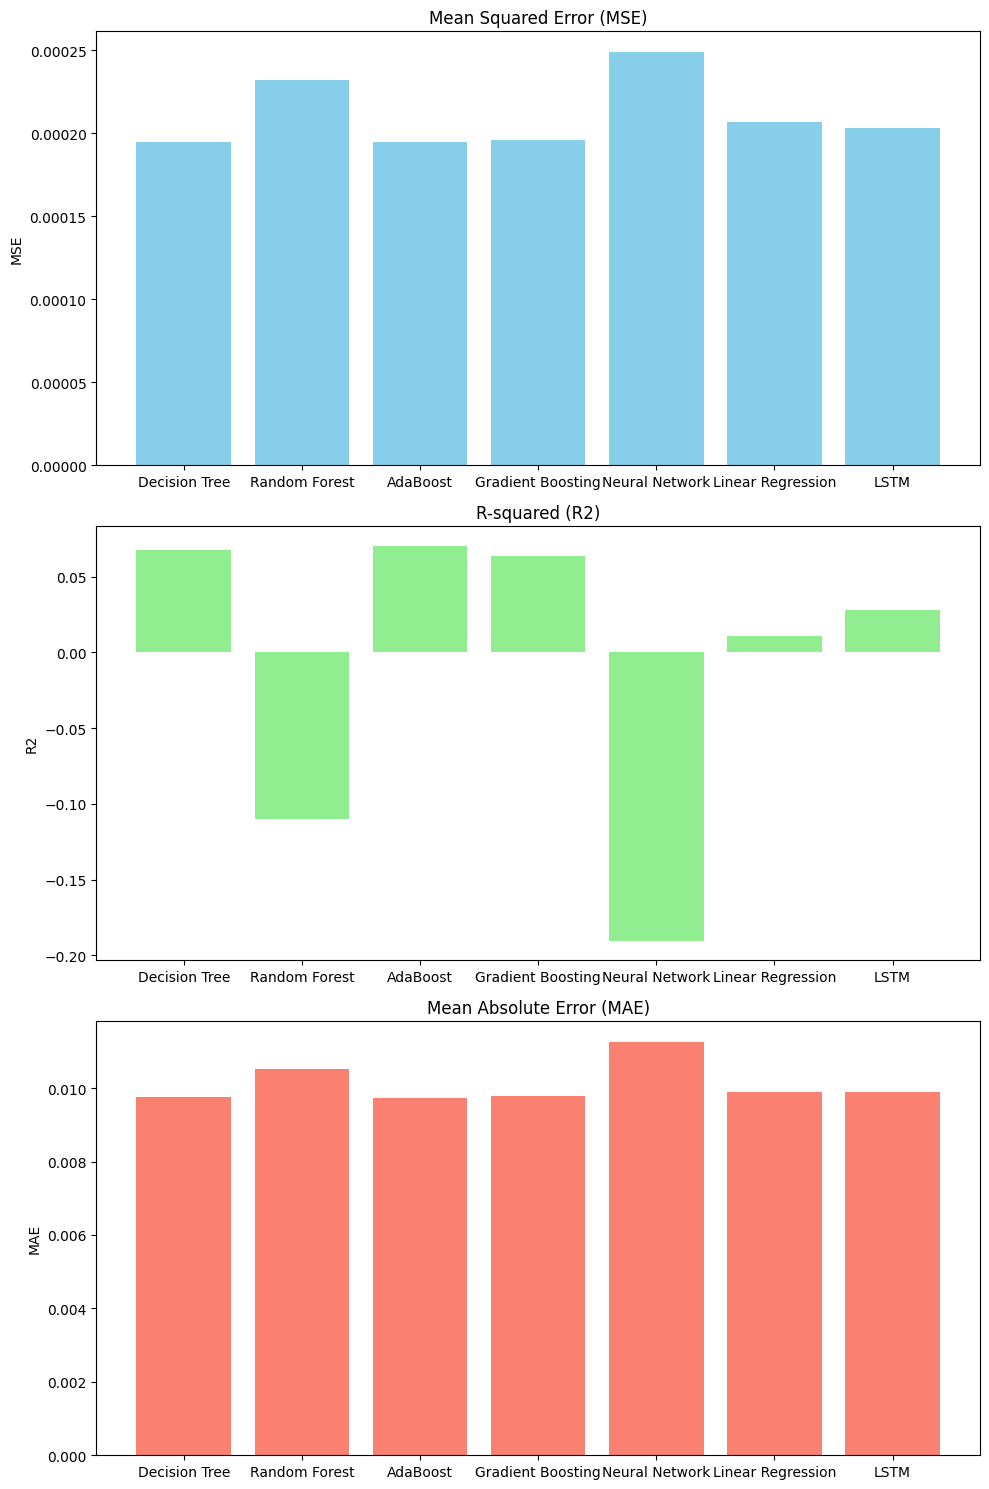

In [43]:
# Extracting metrics for plotting
models = list(metrics.keys())
mse_values = [metrics[model][0] for model in models]
r2_values = [metrics[model][1] for model in models]
mae_values = [metrics[model][2] for model in models]

# Plotting the performance metrics
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(models, mse_values, color='skyblue')
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_ylabel('MSE')

ax[1].bar(models, r2_values, color='lightgreen')
ax[1].set_title('R-squared (R2)')
ax[1].set_ylabel('R2')

ax[2].bar(models, mae_values, color='salmon')
ax[2].set_title('Mean Absolute Error (MAE)')
ax[2].set_ylabel('MAE')

plt.tight_layout()
plt.show()
